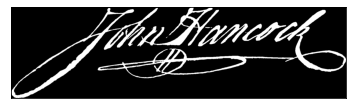

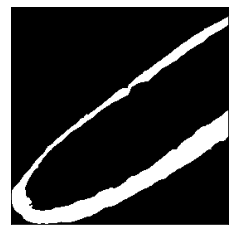

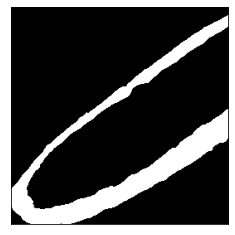

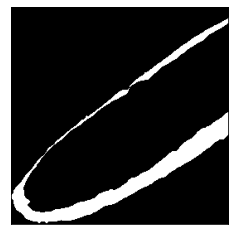

TypeError: len() of unsized object

TypeError: len() of unsized object

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('JohnHancocksSignature.png', cv2.IMREAD_UNCHANGED) # 서명 영상 불러오기

t, bin_img = cv2.threshold(img[:, :, 3], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # img의 3번 채널에 오츄 이진화를 적용한 결과를 bin_img에 저장
plt.imshow(bin_img, cmap = 'gray'), plt.xticks([]), plt.yticks([]) # matplotlib 모듈의 imshow 함수로 bin_img를 출력
plt.show()

# 모폴로지 효과를 확인할 목적으로 영상의 일부만 잘라 b에 저장하고, 잘라낸 패치를 디스플레이
b = bin_img[bin_img.shape[0]//2:bin_img.shape[0], 0:bin_img.shape[0]//2 + 1] 
plt.imshow(b, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.show()

# 구조 요소를 se 객체에 저장
se = np.uint8([[0, 0, 1, 0, 0],
               [0, 1, 1, 1, 0],
               [1, 1, 1, 1, 1],
               [0, 1, 1, 1, 0],
               [0, 0, 1, 0, 0]])

b_dilation = cv2.dilate(b, se, iterations = 1) # 팽창 연산 적용
plt.imshow(b_dilation, cmap = 'gray'), plt.xticks([]), plt.yticks([]) # 팽창을 적용한 영상 디스플레이
plt.show()

# 침식을 적용하고 결과를 디스플레이
b_erosion = cv2.erode(b, se, iterations = 1)
plt.imshow(b_erosion, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.show()

# 팽창을 적용한 영상에 침식을 적
b_closing = cv2.erode(cv2.dilate(b, se, iterations = 1), se, iterations = 1)
plt.imshow(b_closing, cmap = 'gray'), plt.xticks({}), plt.yticks({})
plt.show()